# 2.0 Notebook 2: Exploratory Data Analysis

Now that we have a good intuitive sense of the data, Next step involves taking a closer look at attributes and data values. In this section, we are getting familiar with the data, which will provide useful knowledge for data pre-processing.
## 2.1 Objectives of Data Exploration
Exploratory data analysis (EDA) is a very important step which takes place after feature engineering and acquiring data and it should be done before any modeling. The results of data exploration can be extremely useful in grasping the structure of the data, the distribution of the values, and the presence of extreme values and interrelationships within the data set.
> **The purpose of EDA is:**
* to use summary statistics and visualizations to better understand data, 
*find clues about the tendencies of the data, its quality and to formulate assumptions and the hypothesis of our analysis
* For data preprocessing to be successful, it is essential to have an overall picture of the data
Basic statistical descriptions can be used to identify properties of the data and highlight which data values should be treated as noise or outliers.** 

Next the data will be examined using two main methods:

1. ***Descriptive statistics*** is the process of condensing key characteristics of the data set into simple numeric metrics. Some of the common metrics used are mean, standard deviation, and correlation. 
	
2. ***Visualization*** is the process of projecting the data, or parts of it, into Cartesian space or into abstract images. In the data mining process, data exploration is leveraged in many different steps including preprocessing, modeling, and interpretation of results. 


# 2.2 Descriptive statistics


In [195]:
#Load libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns


#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm


plt.rcParams['figure.figsize'] = (15,8) 
plt.rcParams['axes.titlesize'] = 'large'

In [196]:
data = pd.read_csv('data/clean-data.csv', index_col=False)
data.drop('Unnamed: 0',axis=1, inplace=True)
data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [197]:
#basic descriptive statistics
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Convert Strings into Binary Data

The diagnosis variable is categorical with two possible values (Malignant or Benign). Since machine learning models require numerical input, it is encoded as a binary variable using 0 and 1.

In [198]:
# Converting 'Diagnosis' column to numerical values
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})
data.head(20)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [199]:
# Calculate the skewness for each numerical column, to know how asymmetrical the data distribution is
# (i.e., whether it leans to the left or right of the mean)
data.skew()

diagnosis                  0.528461
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1

### Skewness Interpretation

- Skewness indicates whether a distribution is:
  - **Positive (right-skewed)**: long tail on the right (higher values)  
  - **Negative (left-skewed)**: long tail on the left (lower values)  
  - Values closer to **0** indicate a more symmetrical distribution.

---

### Observations

- **All values are positive**  
  Every feature shows a **positive (right) skew**, meaning the distributions have longer right-side tails (higher values).

- **High Skew (> 1)**  
  These features are highly skewed, indicating many small values with a few extreme outliers:
  - **area_mean (1.65)**
  - **concavity_mean (1.40)**
  - **area_se (5.45)** *(especially high skew among standard error features)*

- **Low Skew (< 0.5)**  
  These features are closer to a normal (Gaussian) distribution:
  - **smoothness_mean (0.46)**
  - **texture_worst (0.50)**


In [200]:
# Identify the unique values in the 'diagnosis' column as a quality check
data.diagnosis.unique()

array([1, 0])

In [201]:
# Group by diagnosis and review the output.
diag_gr = data.groupby('diagnosis')
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

,# of observations
diagnosis,
0,357
1,212


Check binary encoding from NB1 to confirm the coversion of the diagnosis categorical data into numeric, where
* Malignant = 1 (indicates prescence of cancer cells)
* Benign = 0 (indicates abscence)

##### **Observation**
> *357 observations indicating the absence of cancer cells and 212 show absence of cancer cell*

Lets confirm this, by ploting the histogram

# 2.3 Unimodal Data Visualizations

One of the main goals of visualizing the data here is to observe which features are most helpful in predicting malignant or benign cancer. The other is to see general trends that may aid us in model selection and hyper parameter selection.

Here we are applying 3 techniques to understand each attribute of your dataset independently.
* Histograms.
* Density Plots.
* Box and Whisker Plots.

C:\Users\Jad Zoghaib\AppData\Local\Temp\ipykernel_22764\3624802718.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Benign (0)', 'Malignant (1)'])


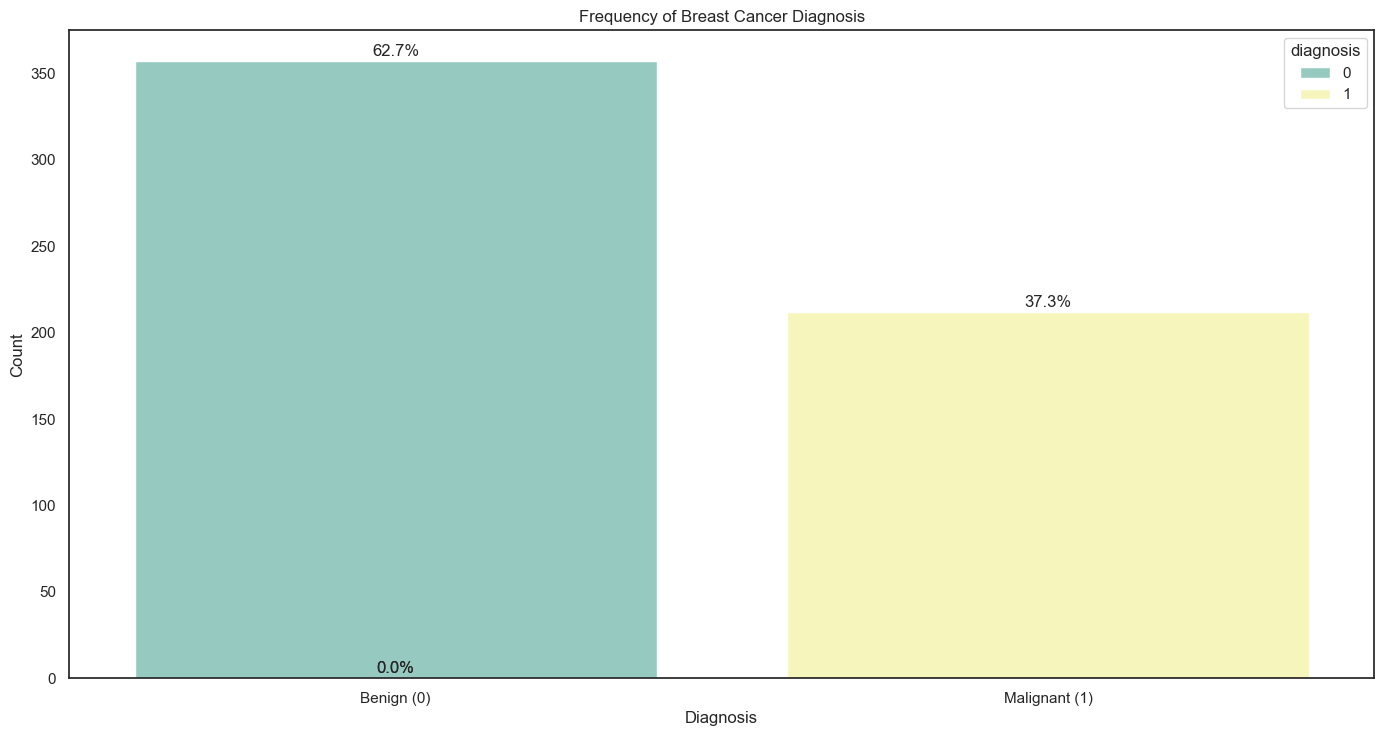

In [202]:
# lets get the frequency of cancer diagnosis
sns.set_style("white")
sns.set_context("notebook", rc={"figure.figsize": (10, 8)})

ax = sns.countplot(x='diagnosis', data=data, palette="Set3", hue= 'diagnosis', order=[0, 1])
ax.set_xlabel('Diagnosis')
ax.set_ylabel('Count')
ax.set_xticklabels(['Benign (0)', 'Malignant (1)'])

# Add a title
plt.title('Frequency of Breast Cancer Diagnosis')

# Add labels
total = len(data)
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height / total)
    ax.text(p.get_x() + p.get_width() / 2., height + 3, percentage, ha="center")
    
    



    
plt.show()

In [203]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## 2.3.1 Visualise distribution of data via histograms


### Separate columns into smaller dataframes to perform visualization

In [204]:
#Break up columns into groups, according to their suffix designation 
#(_mean, _se, and _worst) to perform visualisation plots off. 
#Join the 'ID' and 'Diagnosis' back on


data_diag=data.loc[:,["diagnosis"]]

#For a merge + slice:
data_mean=data.iloc[:,1:11]
data_se=data.iloc[:,11:21]
data_worst=data.iloc[:,21:]




### Histogram the "_mean" suffix designition

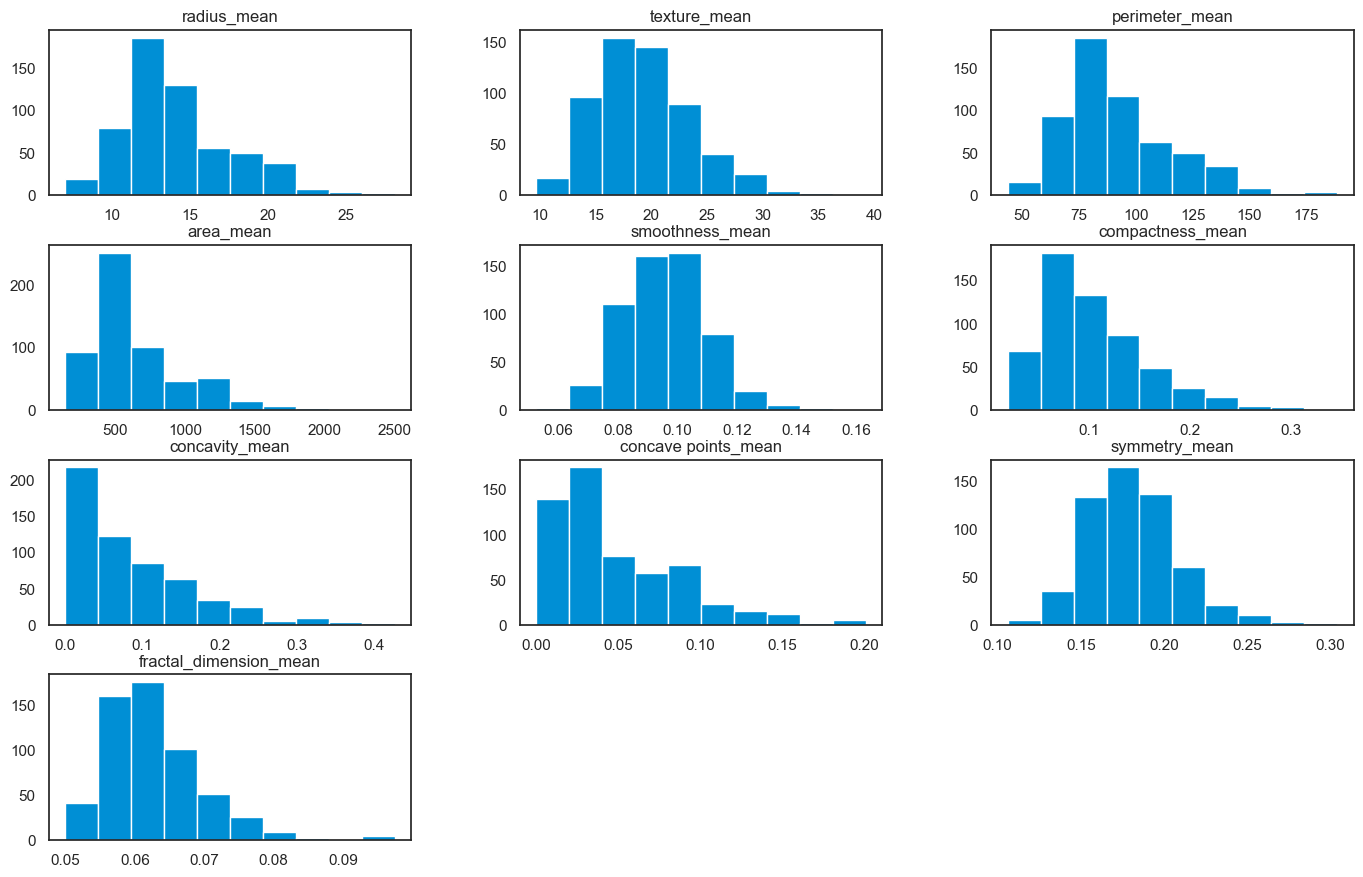

In [205]:
#Plot histograms of CUT1 variables
hist_mean=data_mean.hist(bins=10, figsize=(15, 10),grid=False,)

#Any individual histograms, use this:
#df_cut['radius_worst'].hist(bins=100)

### Histogram for  the "_se" suffix designition__

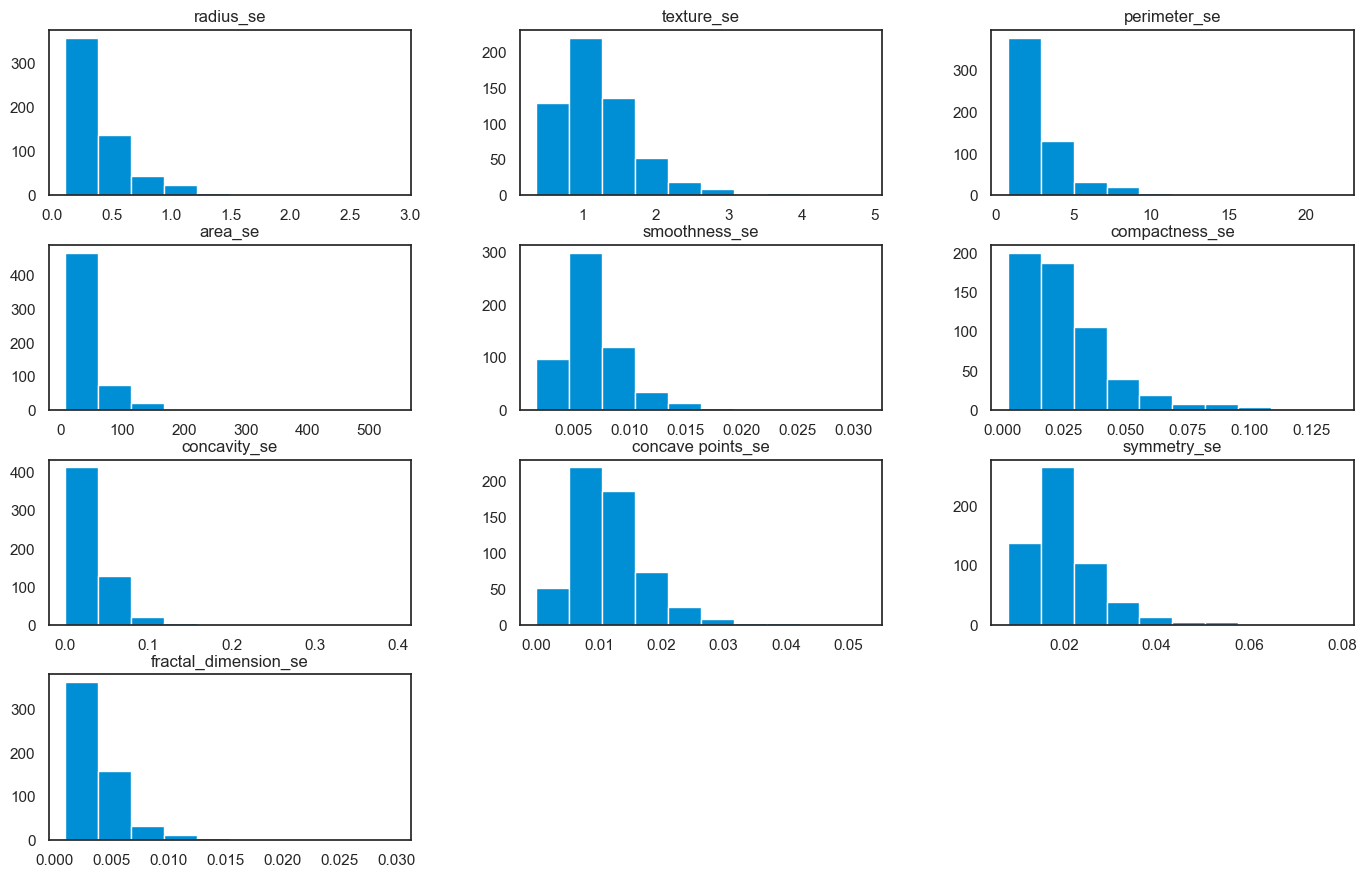

In [206]:
#Plot histograms of _se variables
hist_se=data_se.hist(bins=10, figsize=(15, 10),grid=False,)

### Histogram "_worst" suffix designition__

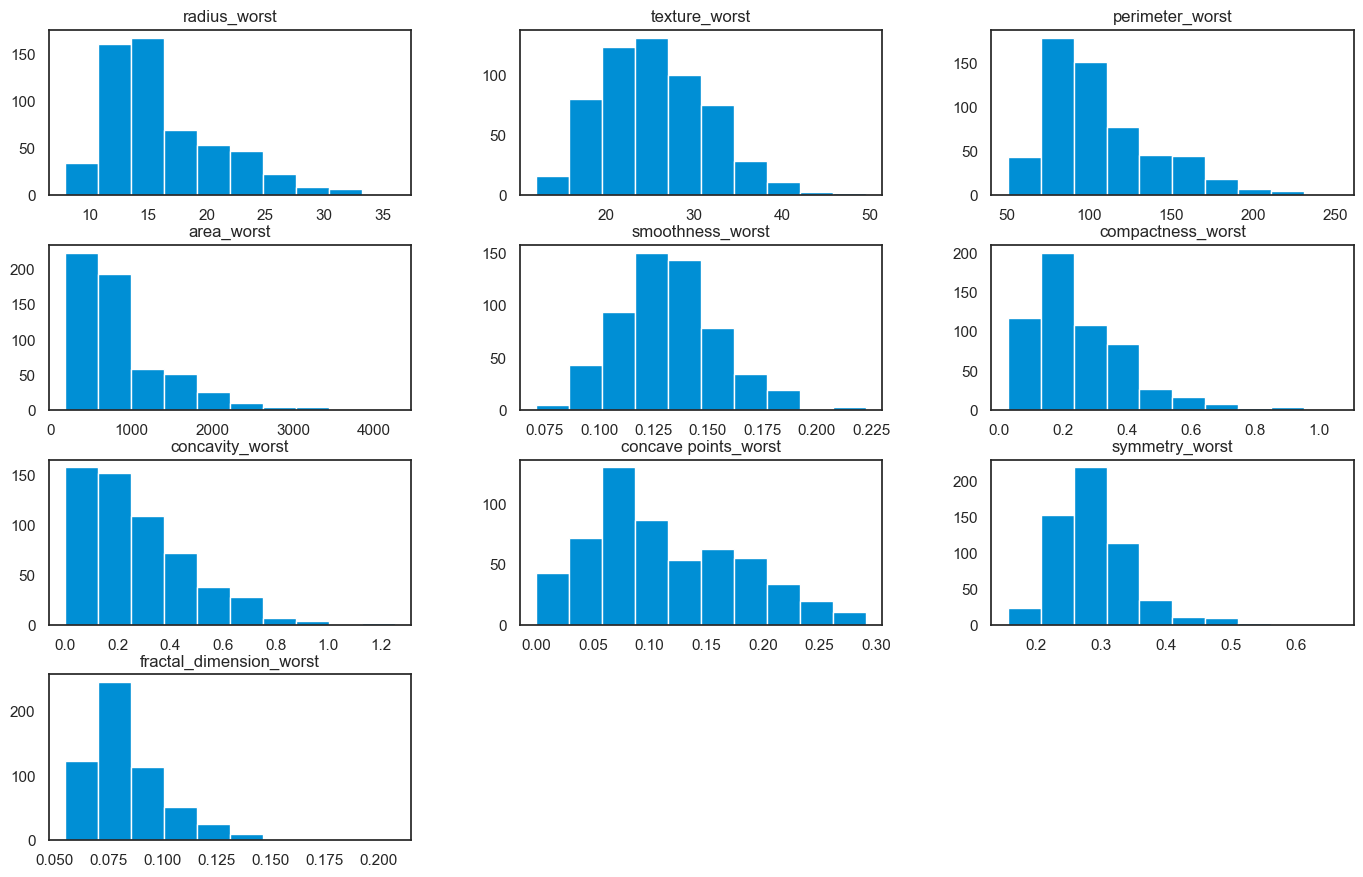

In [207]:
#Plot histograms of _worst variables
hist_worst=data_worst.hist(bins=10, figsize=(15, 10),grid=False,)

### __Observation__ 

>We can see that perhaps the attributes  **concavity**,and **concavity_point ** may have an exponential distribution ( ). We can also see that perhaps the texture and smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.


## 2.3.2 Visualize distribution of data via density plots

### Density plots "_mean" suffix designition

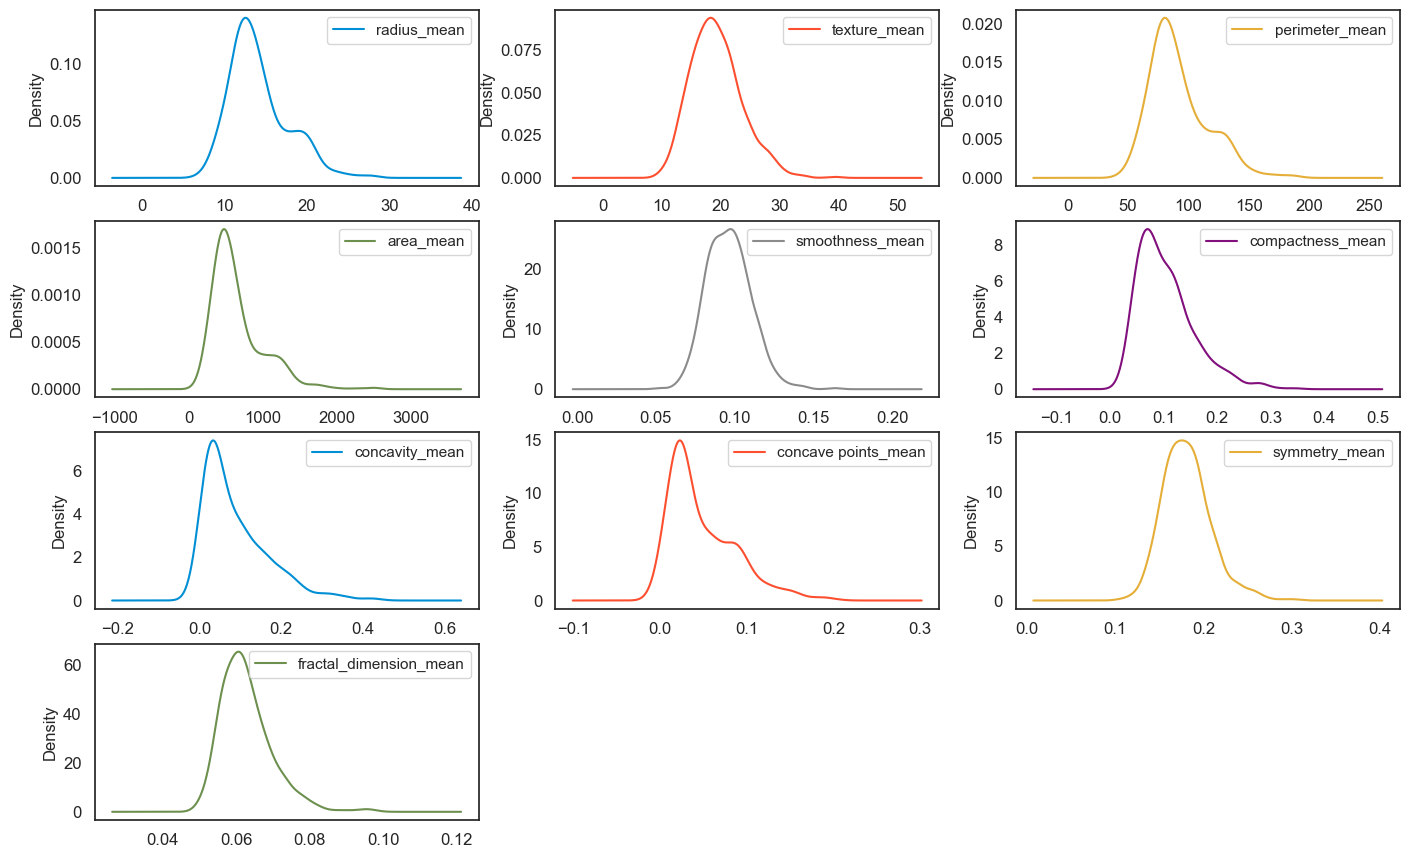

In [208]:
#Density Plots
plt = data_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False,fontsize=12, figsize=(15,10))


### Density plots "_se" suffix designition

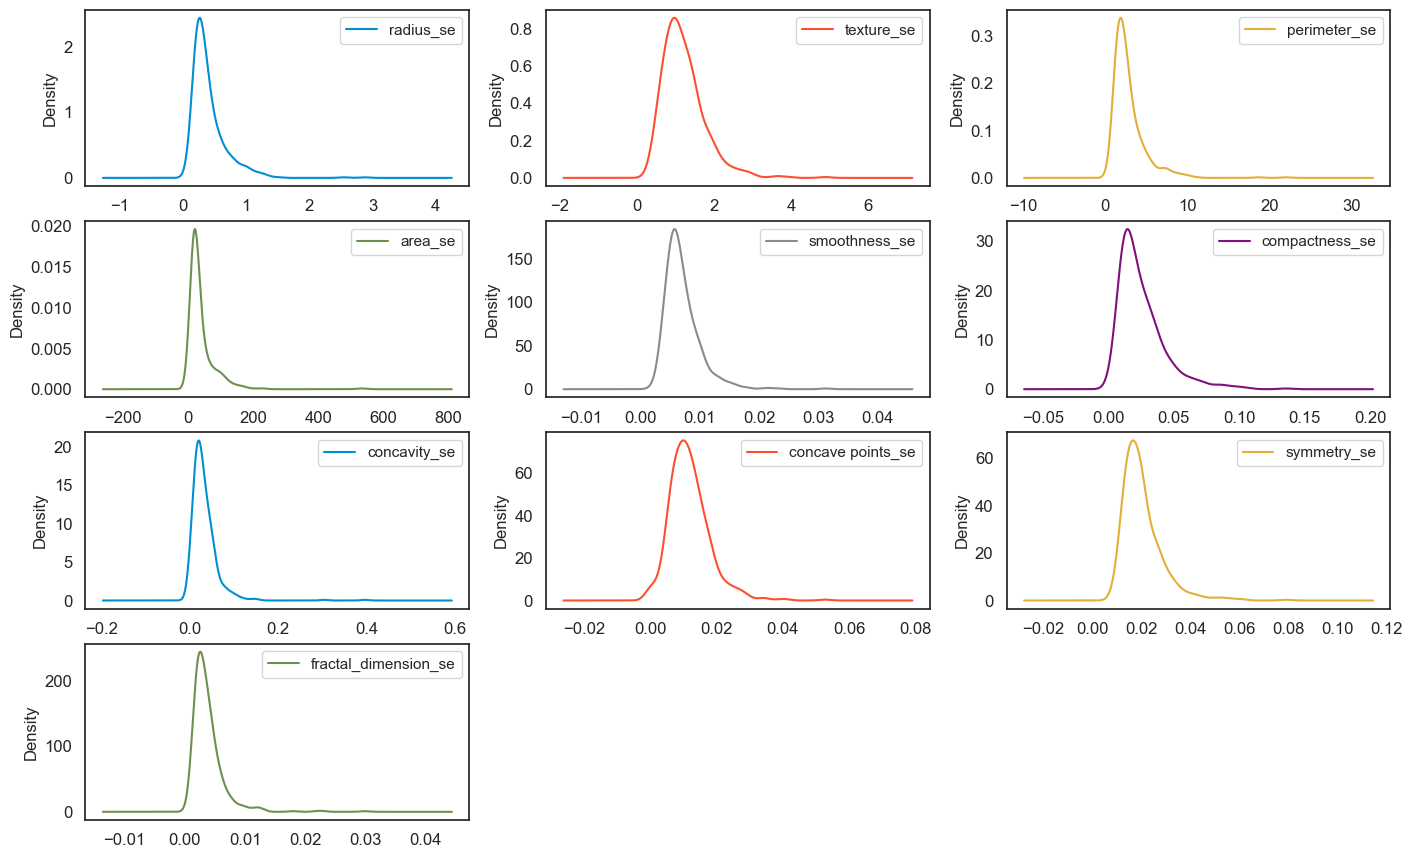

In [209]:
#Density Plots
plt = data_se.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False,fontsize=12, figsize=(15,10))


### Density plot "_worst" suffix designition

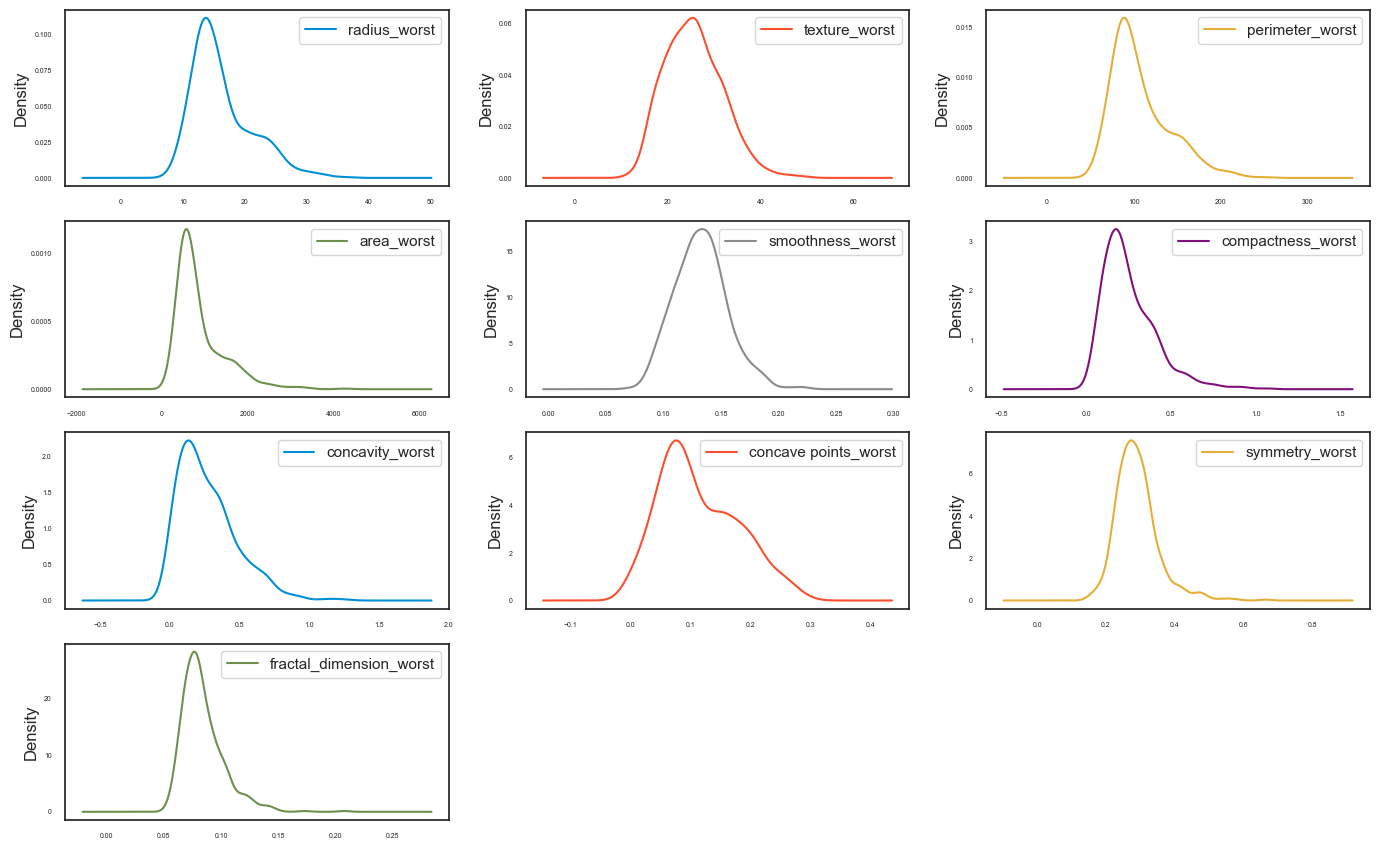

In [210]:
#Density Plots
plt = data_worst.plot(kind= 'kde', subplots=True, layout=(4,3), sharex=False, sharey=False,fontsize=5, 
                     figsize=(15,10))


### Observation
>We can see that perhaps the attributes perimeter,radius, area, concavity,ompactness may have an exponential distribution ( ). We can also see that perhaps the texture and smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.

## 2.3.3 Visualise distribution of data via box plots

### Box plot "_mean" suffix designition

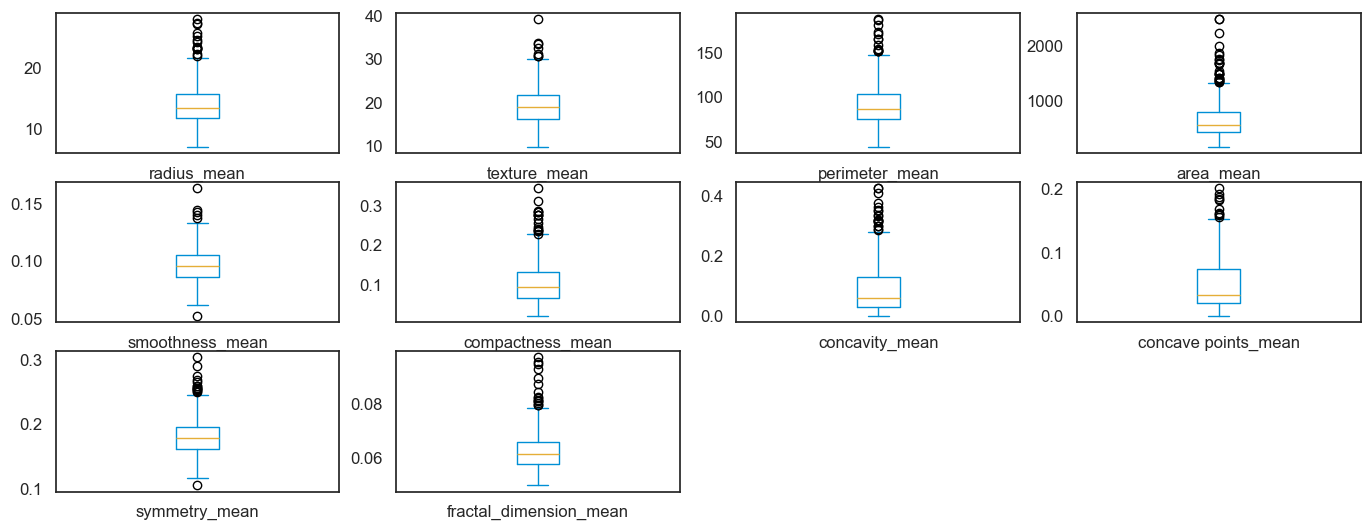

In [211]:
# box and whisker plots
plt=data_mean.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=12)

### Box plot "_se" suffix designition

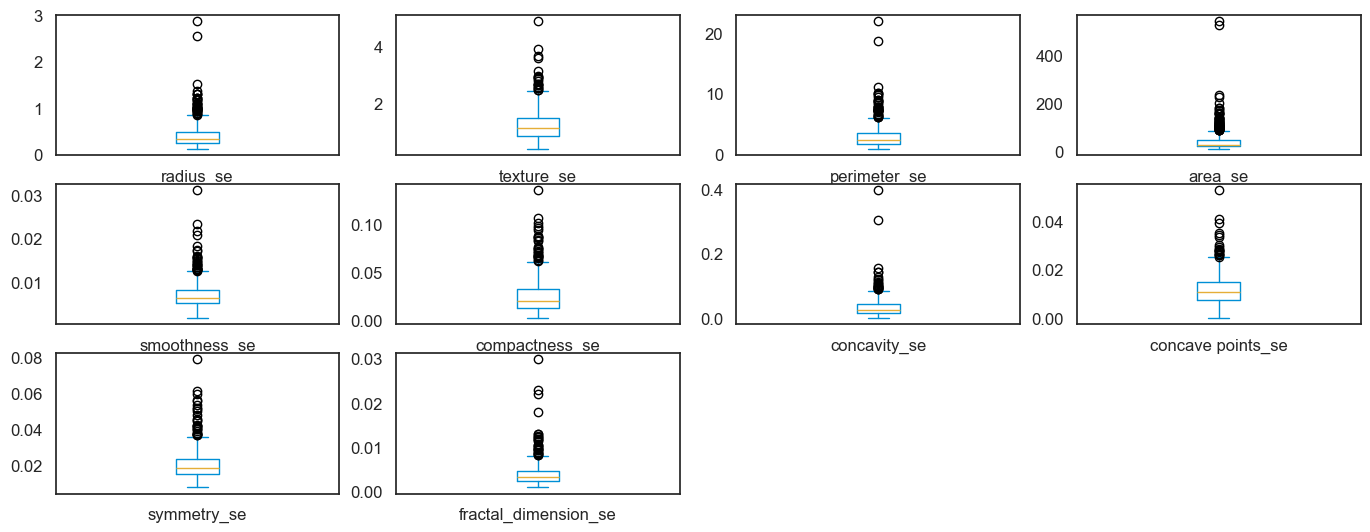

In [212]:
# box and whisker plots
plt=data_se.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=12)

### Box plot "_worst" suffix designition

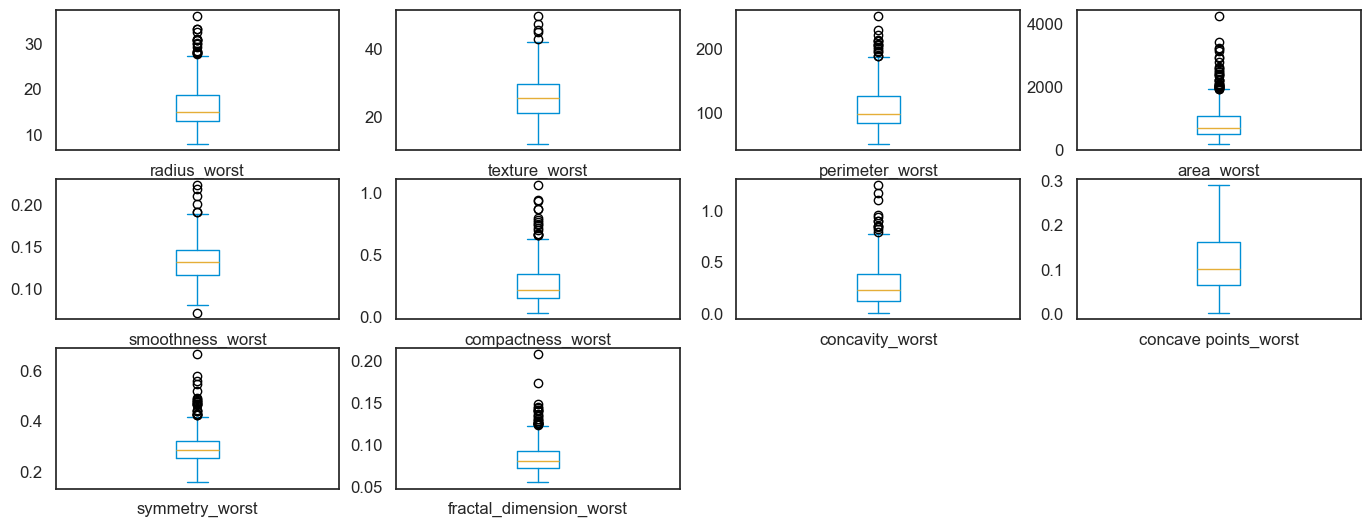

In [213]:
# box and whisker plots
plt=data_worst.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=12)

# 2.4 Multimodal Data Visualizations
* Scatter plots
* Correlation matrix

### Correlation matrix

<Axes: title={'center': 'Breast Cancer Feature Correlation'}>

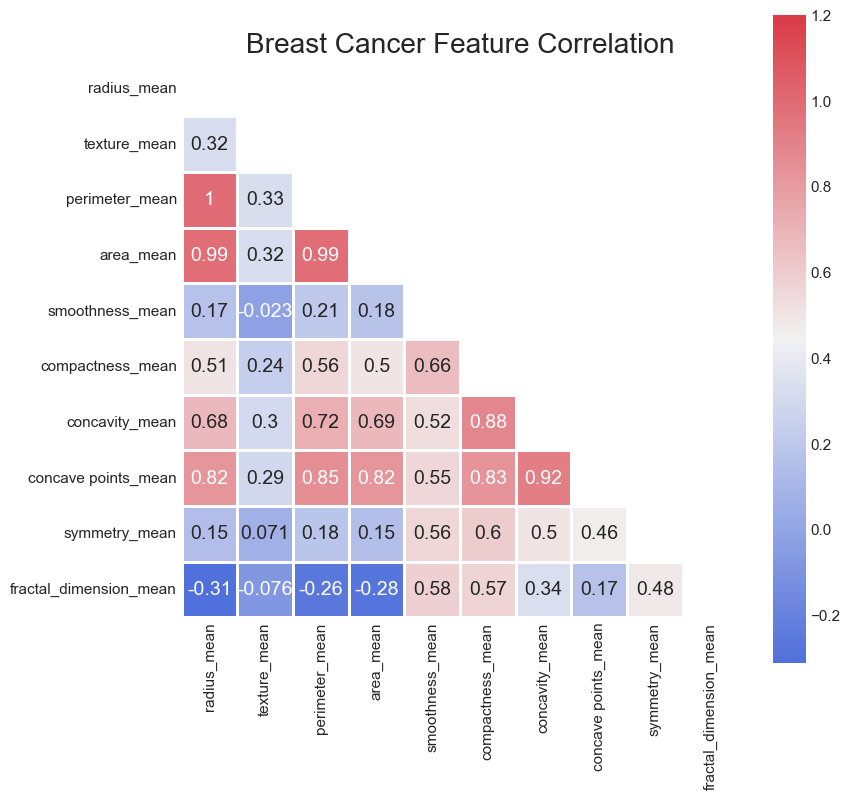

In [214]:
# plot correlation matrix
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
sns.set_style("white")

data = pd.read_csv('data/clean-data.csv', index_col=False)
data.drop('Unnamed: 0',axis=1, inplace=True)
# Compute the correlation matrix
corr = data_mean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
data, ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)

### Observation:
We can see strong positive relationship exists with mean values paramaters between 1-0.75;.

    

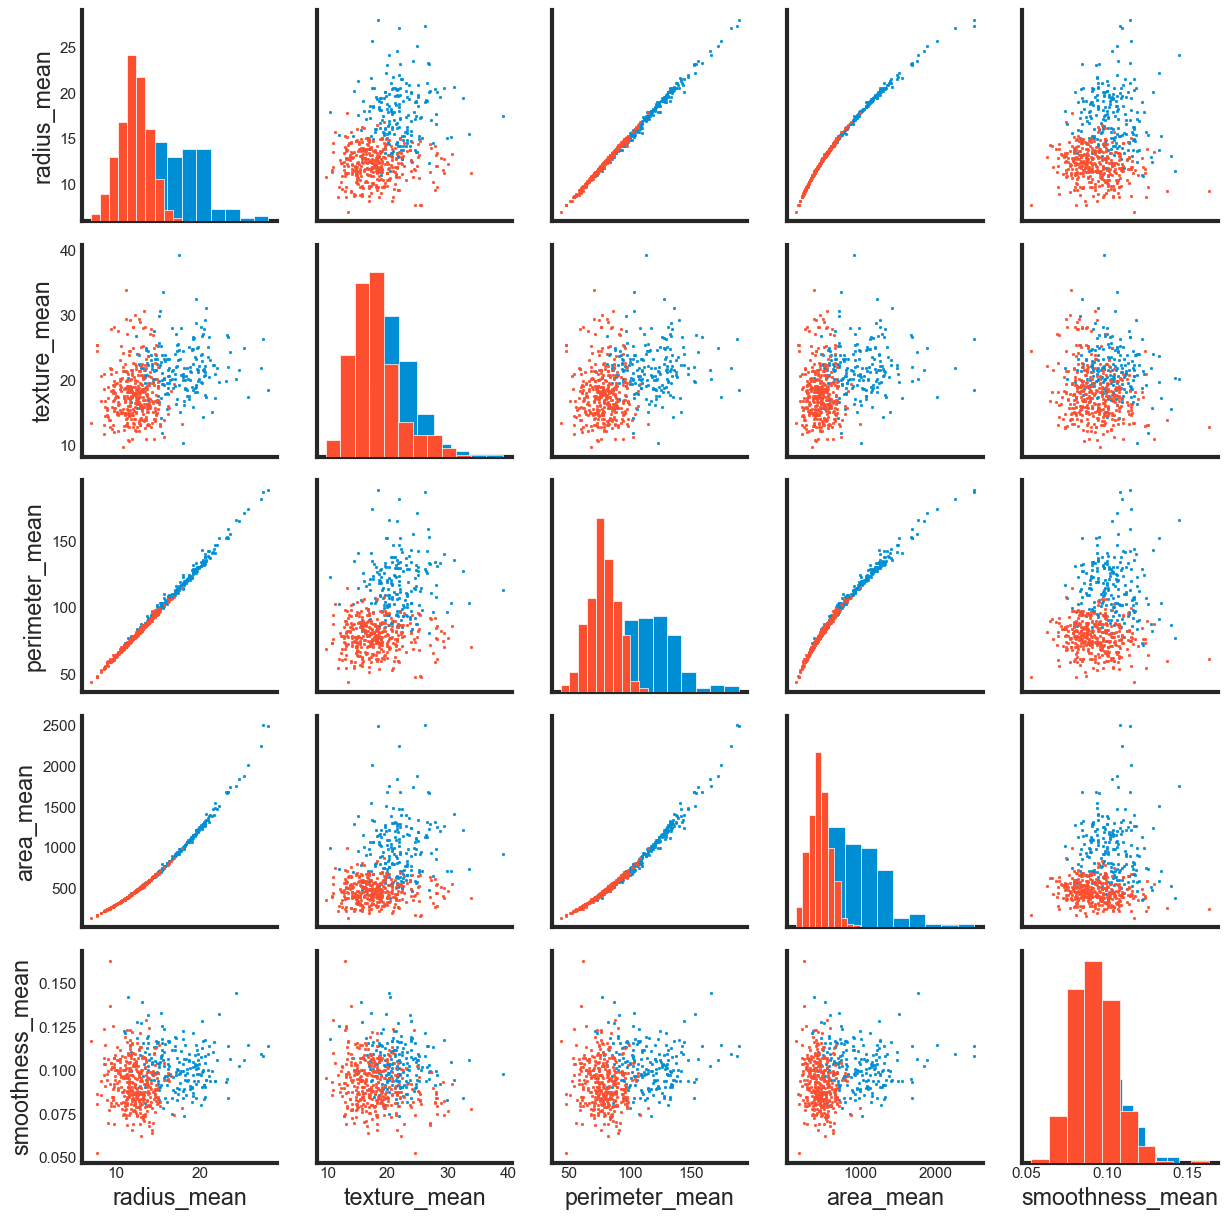

In [215]:

plt.style.use('fivethirtyeight')
sns.set_style("white")

data = pd.read_csv('data/clean-data.csv', index_col=False)
g = sns.PairGrid(data[[data.columns[1],data.columns[2],data.columns[3],
                     data.columns[4], data.columns[5],data.columns[6]]],hue='diagnosis' )
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)

### Summary

* Mean values of cell radius, perimeter, area, compactness, concavity
    and concave points can be used in classification of the cancer. Larger
    values of these parameters tends to show a correlation with malignant
    tumors.
* mean values of texture, smoothness, symmetry or fractual dimension
    does not show a particular preference of one diagnosis over the other. 
    
* In any of the histograms there are no noticeable large outliers that warrants further cleanup.